In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb


In [4]:
df=pd.read_csv('/content/indian_liver_patient.csv')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


**HANDLING NULL VALUES**

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df=df.fillna(method='bfill')
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**DROPPING DUPLICATES**

In [10]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


<Axes: xlabel='Gender'>

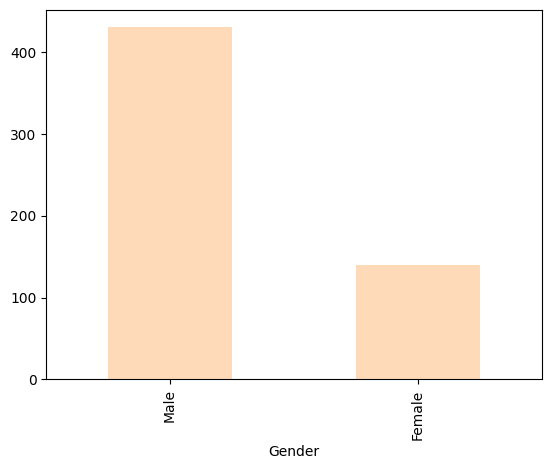

In [11]:
df['Gender'].value_counts().plot.bar(color='peachpuff')

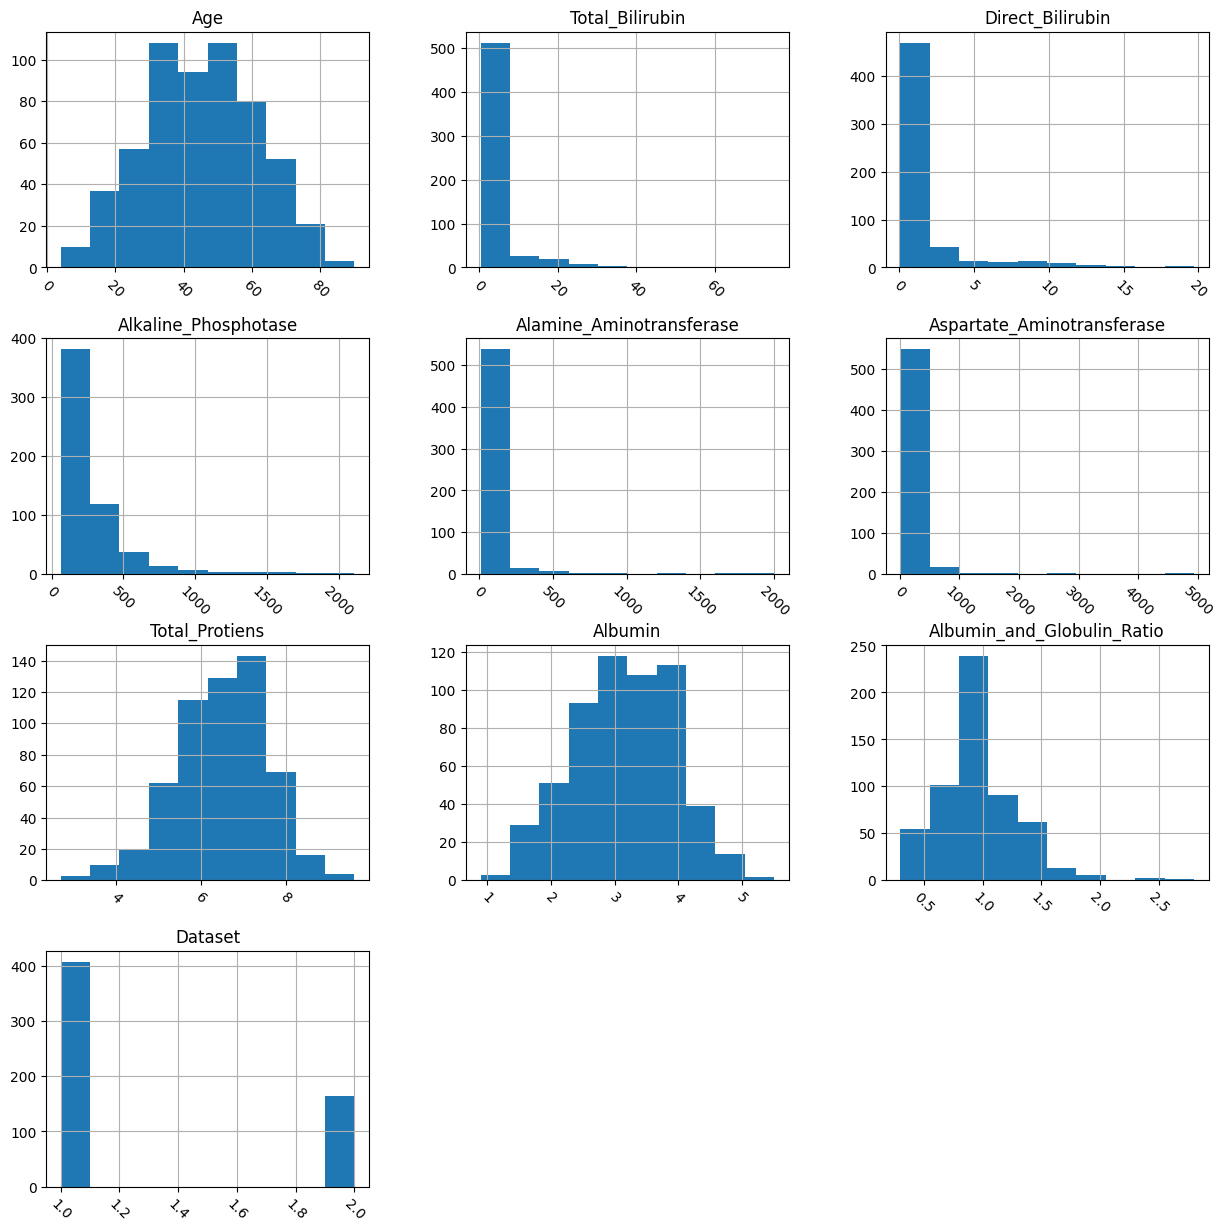

In [12]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [13]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [14]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**Converting Dataset values from 2 to 0 and 1 to 1:**
* (0 for no disease & 1 for liver disease)



In [15]:
df['Dataset'].value_counts()

Dataset
1    406
2    164
Name: count, dtype: int64

In [16]:
df['Dataset'] = df['Dataset'].map({2:0,1:1})
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<Axes: >

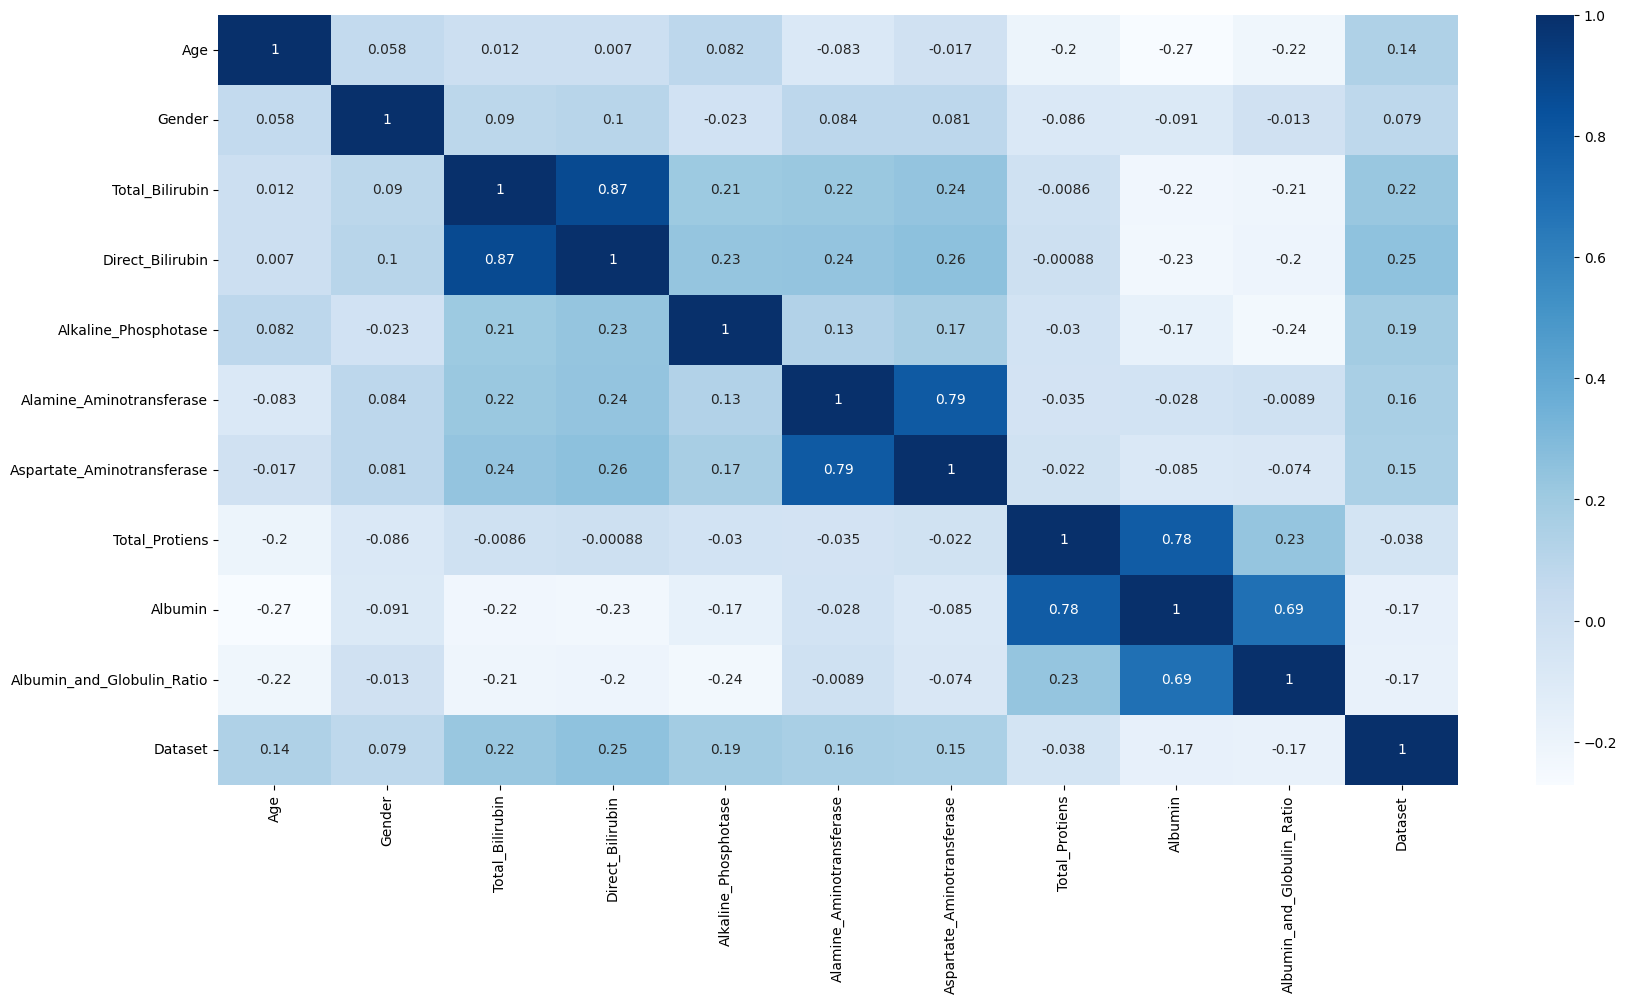

In [17]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Blues",annot=True)

**Min-Max Scaling**

In [18]:
for x in df.columns:
    df[x]=(df[x]-df[x].min())/(df[x].max()-df[x].min())
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1.0


In [19]:
import pandas as pd

# Separating the data into three categories: with liver disease, no disease, and total
with_disease = df[df['Dataset'] == 1]
no_disease = df[df['Dataset'] == 0]
total = df

# Function to calculate max, min, and median values
def calculate_statistics(df):
    return df.max(), df.min(), df.median()

# Calculate the statistics for each category
max_with_disease, min_with_disease, median_with_disease = calculate_statistics(with_disease)
max_no_disease, min_no_disease, median_no_disease = calculate_statistics(no_disease)
max_total, min_total, median_total = calculate_statistics(total)

# Compile results into dictionaries
max_values = {
    'With Liver Disease': max_with_disease,
    'No Disease': max_no_disease,
    'Total': max_total
}
min_values = {
    'With Liver Disease': min_with_disease,
    'No Disease': min_no_disease,
    'Total': min_total
}
median_values = {
    'With Liver Disease': median_with_disease,
    'No Disease': median_no_disease,
    'Total': median_total
}

# Create DataFrames to display the results
max_df = pd.DataFrame(max_values).transpose()
min_df = pd.DataFrame(min_values).transpose()
median_df = pd.DataFrame(median_values).transpose()

# Display the results
print("Maximum Values:")
print(max_df)

print("\n\nMinimum Values:")
print(min_df)

print("\n\nMedian Values:")
print(median_df)


Maximum Values:
                        Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
With Liver Disease  1.00000     1.0         1.000000          1.000000   
No Disease          0.94186     1.0         0.092493          0.178571   
Total               1.00000     1.0         1.000000          1.000000   

                    Alkaline_Phosphotase  Alamine_Aminotransferase  \
With Liver Disease              1.000000                   1.00000   
No Disease                      0.741085                   0.08593   
Total                           1.000000                   1.00000   

                    Aspartate_Aminotransferase  Total_Protiens   Albumin  \
With Liver Disease                    1.000000        1.000000  1.000000   
No Disease                            0.055906        0.942029  0.891304   
Total                                 1.000000        1.000000  1.000000   

                    Albumin_and_Globulin_Ratio  Dataset  
With Liver Disease                        1

In [20]:
df['Gender'].value_counts()

Gender
1.0    430
0.0    140
Name: count, dtype: int64

In [21]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define features and target variable
X = df.drop(['Dataset', 'Age', 'Gender'], axis=1)
y = df['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and test multiple machine learning algorithms
classifiers = {
    'Logitic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest':RandomForestClassifier(class_weight='balanced',random_state=42),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("="*50)

Algorithm: Logitic Regression
Accuracy: 0.76
              precision    recall  f1-score   support

         0.0       0.58      0.24      0.34        29
         1.0       0.78      0.94      0.86        85

    accuracy                           0.76       114
   macro avg       0.68      0.59      0.60       114
weighted avg       0.73      0.76      0.72       114

Algorithm: Decision Tree
Accuracy: 0.65
              precision    recall  f1-score   support

         0.0       0.35      0.45      0.39        29
         1.0       0.79      0.72      0.75        85

    accuracy                           0.65       114
   macro avg       0.57      0.58      0.57       114
weighted avg       0.68      0.65      0.66       114

Algorithm: Gradient Boosting
Accuracy: 0.68
              precision    recall  f1-score   support

         0.0       0.35      0.28      0.31        29
         1.0       0.77      0.82      0.80        85

    accuracy                           0.68       114

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Algorithm: Neural Network
Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.42      0.55      0.48        29
         1.0       0.83      0.74      0.78        85

    accuracy                           0.69       114
   macro avg       0.62      0.65      0.63       114
weighted avg       0.73      0.69      0.71       114



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Split data into features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       0.41      0.76      0.53        29
         1.0       0.88      0.62      0.73        85

    accuracy                           0.66       114
   macro avg       0.65      0.69      0.63       114
weighted avg       0.76      0.66      0.68       114

              precision    recall  f1-score   support

         0.0       0.39      0.52      0.45        29
         1.0       0.82      0.73      0.77        85

    accuracy                           0.68       114
   macro avg       0.61      0.62      0.61       114
weighted avg       0.71      0.68      0.69       114



In [24]:
df_male=df[df["Gender"]==1]

In [25]:
df_male

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1.0
5,0.488372,1.0,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,0.0
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1.0
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1.0
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1.0


In [26]:
df_male.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define features and target variable
X = df_male.drop(['Dataset', 'Age', 'Gender'], axis=1)
y = df_male['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and test multiple machine learning algorithms
classifiers = {
    'Logitic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("="*50)

Algorithm: Logitic Regression
Accuracy: 0.76
              precision    recall  f1-score   support

         0.0       0.50      0.10      0.16        21
         1.0       0.77      0.97      0.86        65

    accuracy                           0.76        86
   macro avg       0.63      0.53      0.51        86
weighted avg       0.70      0.76      0.69        86

Algorithm: Decision Tree
Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.35      0.33      0.34        21
         1.0       0.79      0.80      0.79        65

    accuracy                           0.69        86
   macro avg       0.57      0.57      0.57        86
weighted avg       0.68      0.69      0.68        86

Algorithm: Gradient Boosting
Accuracy: 0.73
              precision    recall  f1-score   support

         0.0       0.44      0.33      0.38        21
         1.0       0.80      0.86      0.83        65

    accuracy                           0.73        86

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Algorithm: Neural Network
Accuracy: 0.78
              precision    recall  f1-score   support

         0.0       0.56      0.48      0.51        21
         1.0       0.84      0.88      0.86        65

    accuracy                           0.78        86
   macro avg       0.70      0.68      0.68        86
weighted avg       0.77      0.78      0.77        86



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
df_female=df[df["Gender"]==0]

In [29]:
df_female

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0
6,0.255814,0.0,0.006702,0.005102,0.044455,0.003015,0.000407,0.623188,0.565217,0.280,1.0
7,0.290698,0.0,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.320,1.0
13,0.813953,0.0,0.009383,0.015306,0.073766,0.006030,0.004066,0.782609,0.695652,0.280,1.0
18,0.418605,0.0,0.006702,0.010204,0.112360,0.111558,0.047774,0.594203,0.478261,0.200,1.0
...,...,...,...,...,...,...,...,...,...,...,...
547,0.534884,0.0,0.365952,0.545918,0.154861,0.014573,0.068713,0.637681,0.304348,0.040,1.0
549,0.418605,0.0,0.022788,0.045918,0.344406,0.032161,0.026631,0.739130,0.869565,0.520,1.0
564,0.395349,0.0,0.002681,0.000000,0.049829,0.006030,0.004879,0.463768,0.434783,0.240,0.0
566,0.534884,0.0,0.008043,0.010204,0.062531,0.006030,0.004269,0.739130,0.673913,0.280,0.0


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define features and target variable
X = df_female.drop(['Dataset', 'Age', 'Gender'], axis=1)
y = df_female['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and test multiple machine learning algorithms
classifiers = {
    'Logitic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("="*50)

Algorithm: Logitic Regression
Accuracy: 0.54
              precision    recall  f1-score   support

         0.0       0.20      0.10      0.13        10
         1.0       0.61      0.78      0.68        18

    accuracy                           0.54        28
   macro avg       0.40      0.44      0.41        28
weighted avg       0.46      0.54      0.49        28

Algorithm: Decision Tree
Accuracy: 0.64
              precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        10
         1.0       0.75      0.67      0.71        18

    accuracy                           0.64        28
   macro avg       0.62      0.63      0.63        28
weighted avg       0.66      0.64      0.65        28

Algorithm: Gradient Boosting
Accuracy: 0.61
              precision    recall  f1-score   support

         0.0       0.45      0.50      0.48        10
         1.0       0.71      0.67      0.69        18

    accuracy                           0.61        28